# **Time Series Forecasting**

<img src='timeSeries.png'>

In [2]:
import pmdarima

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split


In [4]:
import seaborn as sns
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse


In [5]:
data = pd.read_csv('AirPassengers.csv')
data.head(2)


,Month,#Passengers
0,1949-01,112
1,1949-02,118


In [6]:
data.shape

(144, 2)

In [7]:
import nltk

In [8]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [10]:
data['Month'] = pd.to_datetime(data.Month)
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [18]:
# We have 12 years of data. 
# We will keep 11 years data as training
# 1 year data (12 months) as testing

train = data.loc[:len(data)-12, :]
test = data.loc[ len(data)-12:, :]

Text(0.5, 1.0, 'No of air passengers')

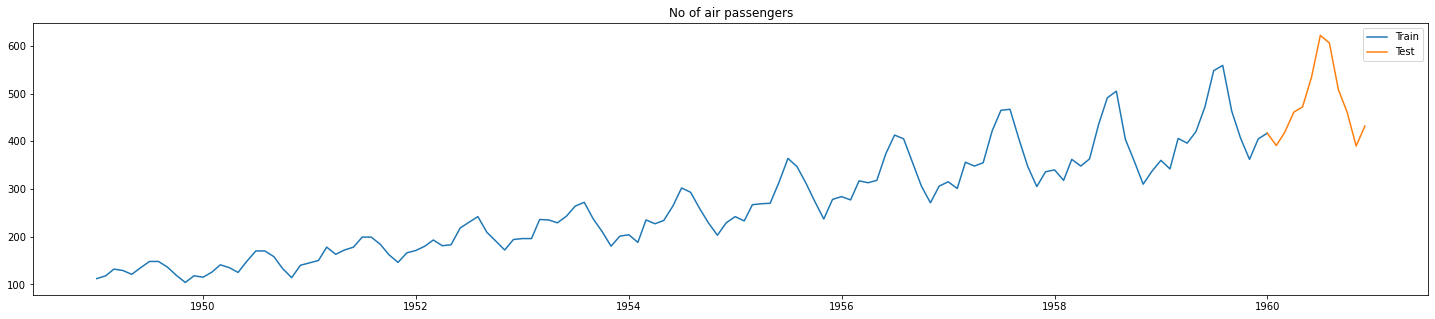

In [19]:
fig, ax = plt.subplots(figsize=(25, 5))
ax.plot('Month', '#Passengers', data=train, label='Train')
ax.plot('Month', '#Passengers', data=test, label='Test')
ax.legend()
ax.set_title('No of air passengers')

## **Build Model**  
=======================================  
Trend Elements  
There are three trend elements that require configuration.  
They are the same as the ARIMA model; specifically:  
p: Trend autoregression order.  
d: Trend difference order.  
q: Trend moving average order.  
  
Seasonal Elements  
There are four seasonal elements that are not part of ARIMA that must be configured; they are:  
P: Seasonal autoregressive order.  
D: Seasonal difference order.  
Q: Seasonal moving average order.  
m: The number of time steps for a single seasonal period.  


In [15]:
model = auto_arima(train['#Passengers'], 
                   seasonal=True, 
                   m=12,
                   max_p=7, max_d=5, max_q=7, 
                   max_P=4, max_D=4, max_Q=4, 
                   scoring='mse',
                   trace=True, error_action='ignore', suppress_warnings=True)

model.fit(train['#Passengers'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=1.01 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=912.700, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=907.606, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=908.564, Time=0.24 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=906.884, Time=0.06 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=907.882, Time=0.22 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.11 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=908.389, Time=0.10 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=908.081, Time=0.10 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=907.694, Time=0.06 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=910.080, Time=0.17 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=908.515, Time=0.14 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 3.440 seconds


ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [21]:
# Forecast for testing data

forecast = test.copy()  # Making deep copy
forecast['Predicted_Passengers'] = model.predict(n_periods= len(test))


Text(0.5, 1.0, 'No of air passengers')

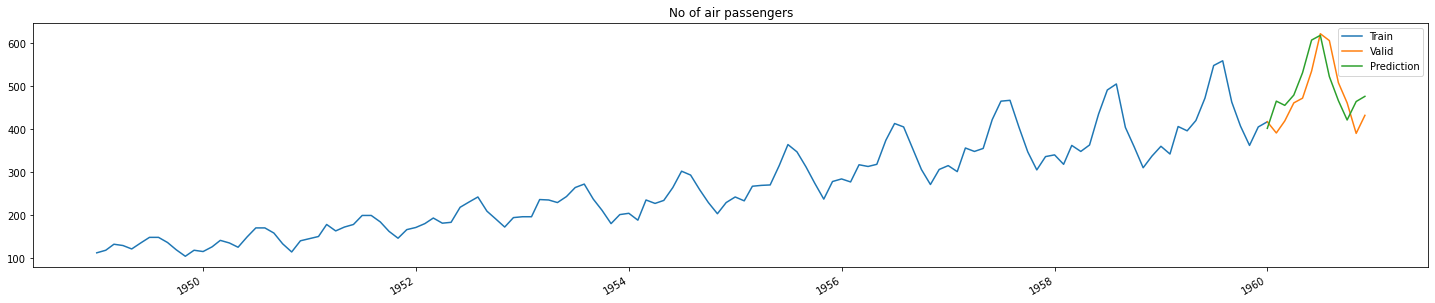

In [22]:
fig, ax = plt.subplots(figsize=(25, 5))
ax.plot(train['Month'], train['#Passengers'], label='Train')
ax.plot(test['Month'], test['#Passengers'], label='Valid')
ax.plot(forecast['Month'], forecast['Predicted_Passengers'], label='Prediction')
fig.autofmt_xdate() # make space for and rotate the x-axis tick labels
ax.legend()
ax.set_title('No of air passengers')

## **Time Series - Energy Production**

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import os

In [25]:
data = pd.read_csv('IPG2211A2N.csv',index_col=0)
data.head()

,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [26]:
data.info

<bound method DataFrame.info of             IPG2211A2N
DATE                  
1939-01-01      3.3842
1939-02-01      3.4100
1939-03-01      3.4875
1939-04-01      3.5133
1939-05-01      3.5133
...                ...
2019-01-01    123.7687
2019-02-01    113.0736
2019-03-01    106.6538
2019-04-01     88.6460
2019-05-01     92.3776

[965 rows x 1 columns]>

In [27]:
data.index = pd.to_datetime(data.index)   # convert index column to data_time

In [28]:
data.columns = ['Energy Production']  
data.head()

,Energy Production
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [29]:
import plotly
import cufflinks as cf
cf.go_offline()

In [30]:
data.iplot(title="Energy Production Between Jan 1939 to May 2019")

## **Decomposing the plot**

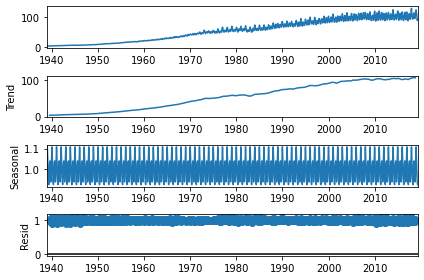

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='multiplicative')

fig = result.plot()


In [32]:
from pmdarima import auto_arima

In [33]:
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12, # Seasonality is 12 months
                           start_P=0, seasonal=True, # Seasonal variations - yearly trend
                           d=1, D=1, trace=True, # Print Status on the fits. Verbose output
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3802.455, Time=1.77 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4319.328, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4151.688, Time=0.46 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3927.033, Time=0.71 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.70 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=3801.631, Time=1.80 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=3983.354, Time=2.10 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=3771.642, Time=6.40 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=3855.143, Time=3.24 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=3752.073, Time=10.87 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=3794.365, Time=7.52 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=3853.198, Time=7.72 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=3897.166, Time=7.66 sec
 ARIMA(2,1,1)(2,1,2)[12]             : AIC=3751.732, Time=10.10 sec
 ARIMA(2,1,1)(1,1,2)[1

In [34]:
train = data.loc['1939-01-01':'2015-12-01']
test = data.loc['2016-01-01':]


## **Train Model**

In [35]:
stepwise_model.fit(train)

ARIMA(order=(3, 1, 1), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

## **Evaluation**

In [36]:
future_forecast = stepwise_model.predict(n_periods=41)

future_forecast = pd.DataFrame(future_forecast, index=test.index, columns=['Prediction'])

In [37]:
pd.concat([test, future_forecast], axis=1).iplot()

In [38]:
pd.concat([data,future_forecast],axis=1).iplot()

## **Forcasting for next year**

In [39]:
stepwise_model.fit(data)   # Train model with full data
future_forecast_1year = stepwise_model.predict(n_periods=13)

next_year = [pd.to_datetime('2019-05-01'),
            pd.to_datetime('2019-06-01'),
            pd.to_datetime('2019-07-01'),
            pd.to_datetime('2019-08-01'),
            pd.to_datetime('2019-09-01'),
            pd.to_datetime('2019-10-01'),
            pd.to_datetime('2019-11-01'),
            pd.to_datetime('2019-12-01'),
            pd.to_datetime('2020-01-01'),
            pd.to_datetime('2020-02-01'),
            pd.to_datetime('2020-03-01'),
            pd.to_datetime('2020-04-01'),
            pd.to_datetime('2020-05-01')]


In [40]:
future_forecast_1year = pd.DataFrame(future_forecast_1year, index=next_year, columns=['Prediction'])

In [41]:
pd.concat([data,future_forecast_1year],axis=1).iplot()

In [42]:
# Future forecast for next two years
future_forecast_2years = stepwise_model.predict(n_periods=25)


In [43]:
next_year = [pd.to_datetime('2019-05-01'),
            pd.to_datetime('2019-06-01'),
            pd.to_datetime('2019-07-01'),
            pd.to_datetime('2019-08-01'),
            pd.to_datetime('2019-09-01'),
            pd.to_datetime('2019-10-01'),
            pd.to_datetime('2019-11-01'),
            pd.to_datetime('2019-12-01'),
            pd.to_datetime('2020-01-01'),
            pd.to_datetime('2020-02-01'),
            pd.to_datetime('2020-03-01'),
            pd.to_datetime('2020-04-01'),
            pd.to_datetime('2020-05-01'),
            pd.to_datetime('2020-06-01'),
            pd.to_datetime('2020-07-01'),
            pd.to_datetime('2020-08-01'),
            pd.to_datetime('2020-09-01'),
            pd.to_datetime('2020-10-01'),
            pd.to_datetime('2020-11-01'),
            pd.to_datetime('2020-12-01'),
            pd.to_datetime('2021-01-01'),
            pd.to_datetime('2021-02-01'),
            pd.to_datetime('2021-03-01'),
            pd.to_datetime('2021-04-01'),
            pd.to_datetime('2021-05-01')]


In [44]:
future_forecast_2years = pd.DataFrame(future_forecast_2years, index=next_year, columns=['Prediction'])

In [45]:
pd.concat([data,future_forecast_2years],axis=1).iplot()